# *Traffic Sign Recognizer - 99% accuracy*

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from seaborn import heatmap
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

## Assigning Path for Dataset

In [2]:
# data_dir = '../input/gtsrb-german-traffic-sign'
# train_path = '../input/gtsrb-german-traffic-sign/Train'
# test_path = '../input/gtsrb-german-traffic-sign/'

# Resizing the images to 32x32x3
IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3

## Finding Total Classes

## Collecting the Training Data

In [3]:
# Opening file for reading in binary mode
import pickle
with open('D:\Project\Traffic Sign Detection\DATABASE/data3.pickle', 'rb') as f:
    image_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
image_data['x_train'] = image_data['x_train'].transpose(0, 2, 3, 1)
image_data['x_validation'] = image_data['x_validation'].transpose(0, 2, 3, 1)
image_data['x_test'] = image_data['x_test'].transpose(0, 2, 3, 1)


X_test = image_data['x_test']
# ind = np.random.choice(X_test.shape[0],3657)
X_test = X_test#[ind]
y_test = image_data['y_test']#[ind]


In [4]:
with open('D:\Project\Traffic Sign Detection\DATABASE/data8.pickle', 'rb') as f:
    gray_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
gray_data['x_train'] = gray_data['x_train'].transpose(0, 2, 3, 1)
gray_data['x_validation'] = gray_data['x_validation'].transpose(0, 2, 3, 1)
gray_data['x_test'] = gray_data['x_test'].transpose(0, 2, 3, 1)


gray_test_imgs = gray_data['x_test']#[ind]

gray_test_labels = gray_data['y_test']#[ind]


In [5]:
# gray_train_labels[gray_train_labels <= 10] = 0 #cycle
# gray_train_labels[gray_train_labels >= 32] = 0 #cycle
# gray_train_labels[(gray_train_labels == 15) |(gray_train_labels == 16)| (gray_train_labels ==17)] = 0 #cycle
# gray_train_labels[(gray_train_labels >= 18) & (gray_train_labels <= 31)] = 1 #triangle
# gray_train_labels[(gray_train_labels == 13) | (gray_train_labels == 11)] = 1 #triangle
# gray_train_labels[gray_train_labels == 14] = 2 # 6
# gray_train_labels[gray_train_labels == 12] = 3 # 4


gray_test_labels[gray_test_labels <= 10] = 0 #cycle
gray_test_labels[gray_test_labels >= 32] = 0 #cycle
gray_test_labels[(gray_test_labels == 15) |(gray_test_labels == 16)| (gray_test_labels ==17)] = 0 #cycle
gray_test_labels[(gray_test_labels >= 18) & (gray_test_labels <= 31)] = 1 #triangle
gray_test_labels[(gray_test_labels == 13) | (gray_test_labels == 11)] = 1 #triangle
gray_test_labels[gray_test_labels == 14] = 2 # 6
gray_test_labels[gray_test_labels == 12] = 3 # 4

# gray_valid_labels[gray_valid_labels <= 10] = 0 #cycle
# gray_valid_labels[gray_valid_labels >= 32] = 0 #cycle
# gray_valid_labels[(gray_valid_labels == 15) |(gray_valid_labels == 16)| (gray_valid_labels ==17)] = 0 #cycle
# gray_valid_labels[(gray_valid_labels >= 18) & (gray_valid_labels <= 31)] = 1 #triangle
# gray_valid_labels[(gray_valid_labels == 13) | (gray_valid_labels == 11)] = 1 #triangle
# gray_valid_labels[gray_valid_labels == 14] = 2 # 6
# gray_valid_labels[gray_valid_labels == 12] = 3 # 4

In [6]:

# gray_x_train = gray_train_imgs
gray_x_test = gray_test_imgs
# gray_x_valid = gray_valid_imgs

# # Normalization
# x_train = x_train / 255
# x_test = x_test / 255

num_class_shape = 4

# One Hot Encoding
# gray_y_train = keras.utils.to_categorical(gray_train_labels, num_class_shape)
gray_y_test = keras.utils.to_categorical(gray_test_labels, num_class_shape)
# gray_y_valid = keras.utils.to_categorical(gray_valid_labels, num_class_shape)



In [7]:
y_test = image_data['y_test']


In [8]:
tri_Dict = {0:11 , 1:13 , 2:18 , 3:19 , 4:20 , 5:21 , 6:22 , 7:23 , 8:24 , 9:25 , 10:26 , 11:27 , 12:28 , 13:29 , 14:30 , 15:31 }


In [9]:
cy_Dict = {0:0 ,1:1 ,2:2, 3:3 , 4:4 , 5:5 , 6:6 , 7:7 , 8:8 , 9:9 ,10:10 ,11:15 , 12:16 , 13:17 , 14:32 , 15:33 , 16:34 , 17:35 , 18:36 , 19:37 , 20:38 , 21:39 , 22:40 , 23:41 , 24:42 }



## Ensemble Model

In [10]:
cy_model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\circle_classifier_model_acc98.h5')
tri_model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\tri_classifier_model_acc96.h5')


In [11]:
model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_3_4_VS_cir_6_acc9982_36percent.h5')
model_1 = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_circleVS6di_acc9995_36percent.h5')
model_2 = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_triangleVS4di_acc9967_36percent.h5')

In [12]:
pred = model.predict(gray_x_test).argmax(axis = 1)
x_1 = gray_x_test[pred == 0] # cir of 6
x_2 = gray_x_test[pred == 1] # tri of 4

pred_1 = model_1.predict(x_1).argmax(axis = 1)
pred_2 = model_2.predict(x_2).argmax(axis = 1)
print(pred_2)

pred_1[pred_1 == 1] = 2 # 6

pred_2[pred_2 == 1] = 3 # 4
pred_2[pred_2 == 0] = 1 # tir


pred[pred == 0] = pred_1
pred[pred == 1] = pred_2

132/132 [==============================] - 0s 3ms/step
[0 0 1 ... 0 1 0]


In [13]:
predictions = pred



In [14]:
pred = np.zeros((y_test.shape))
cir_indx = np.where(predictions== 0)
cir_pred = cy_model.predict(X_test[cir_indx]).argmax(axis=-1)
cir_pred = np.vectorize(cy_Dict.get)(cir_pred)
pred[cir_indx] = cir_pred

tri_indx = np.where(predictions == 1)
tri_pred = tri_model.predict(X_test[tri_indx]).argmax(axis=-1)
tri_pred = np.vectorize(tri_Dict.get)(tri_pred)
pred[tri_indx] = tri_pred
for i , j in [12 , 3] , [14 , 2]:
    rec_indx = np.where(predictions == j)
    pred[rec_indx] = i

111/111 [==============================] - 1s 4ms/step


In [16]:
cr = classification_report(y_test, pred ,output_dict = False)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.97      0.99      0.98       720
           2       0.98      0.98      0.98       750
           3       0.95      0.98      0.96       450
           4       0.99      0.97      0.98       660
           5       0.97      0.95      0.96       630
           6       1.00      0.82      0.90       150
           7       0.99      0.98      0.99       450
           8       0.98      0.99      0.99       450
           9       0.98      1.00      0.99       480
          10       0.99      0.98      0.99       660
          11       0.91      0.97      0.94       420
          12       1.00      0.98      0.99       690
          13       0.98      0.99      0.99       720
          14       1.00      0.99      0.99       270
          15       0.99      1.00      1.00       210
          16       0.97      0.99      0.98       150
          17       0.99    

In [17]:
acc = accuracy_score(y_test, pred )
print(acc)

0.9749802058590658


In [18]:
cr = classification_report(y_test, pred ,output_dict = True)
a = np.zeros((43))
for i in range(0 , 43):
    a[i] = cr[str(i)]['support']

In [19]:
print(cr['weighted avg'])

{'precision': 0.9757811800256959, 'recall': 0.9749802058590658, 'f1-score': 0.9747976579266899, 'support': 12630}


In [24]:
for i in a:
    print(round(i))

17
213
223
124
179
181
38
129
136
144
198
113
197
233
73
64
41
98
119
15
21
31
36
46
24
159
52
18
42
32
50
76
21
54
34
97
29
12
193
30
18
13
34


<AxesSubplot: >

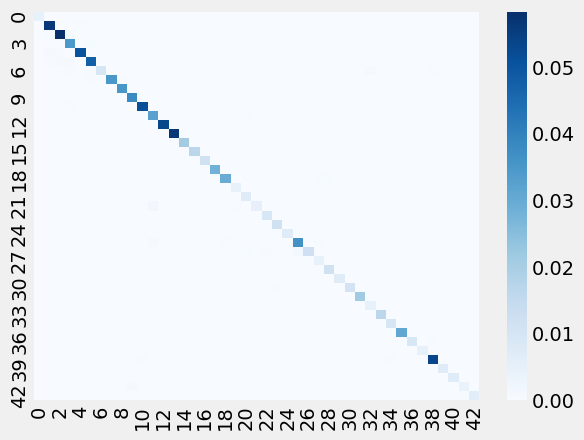

In [24]:
cm = confusion_matrix(y_test, pred)
heatmap(cm / np.sum(cm), annot=False, 
            fmt='.2%', cmap='Blues')

Text(0.5, 1.0, 'Correlation between Variables in happiness21')

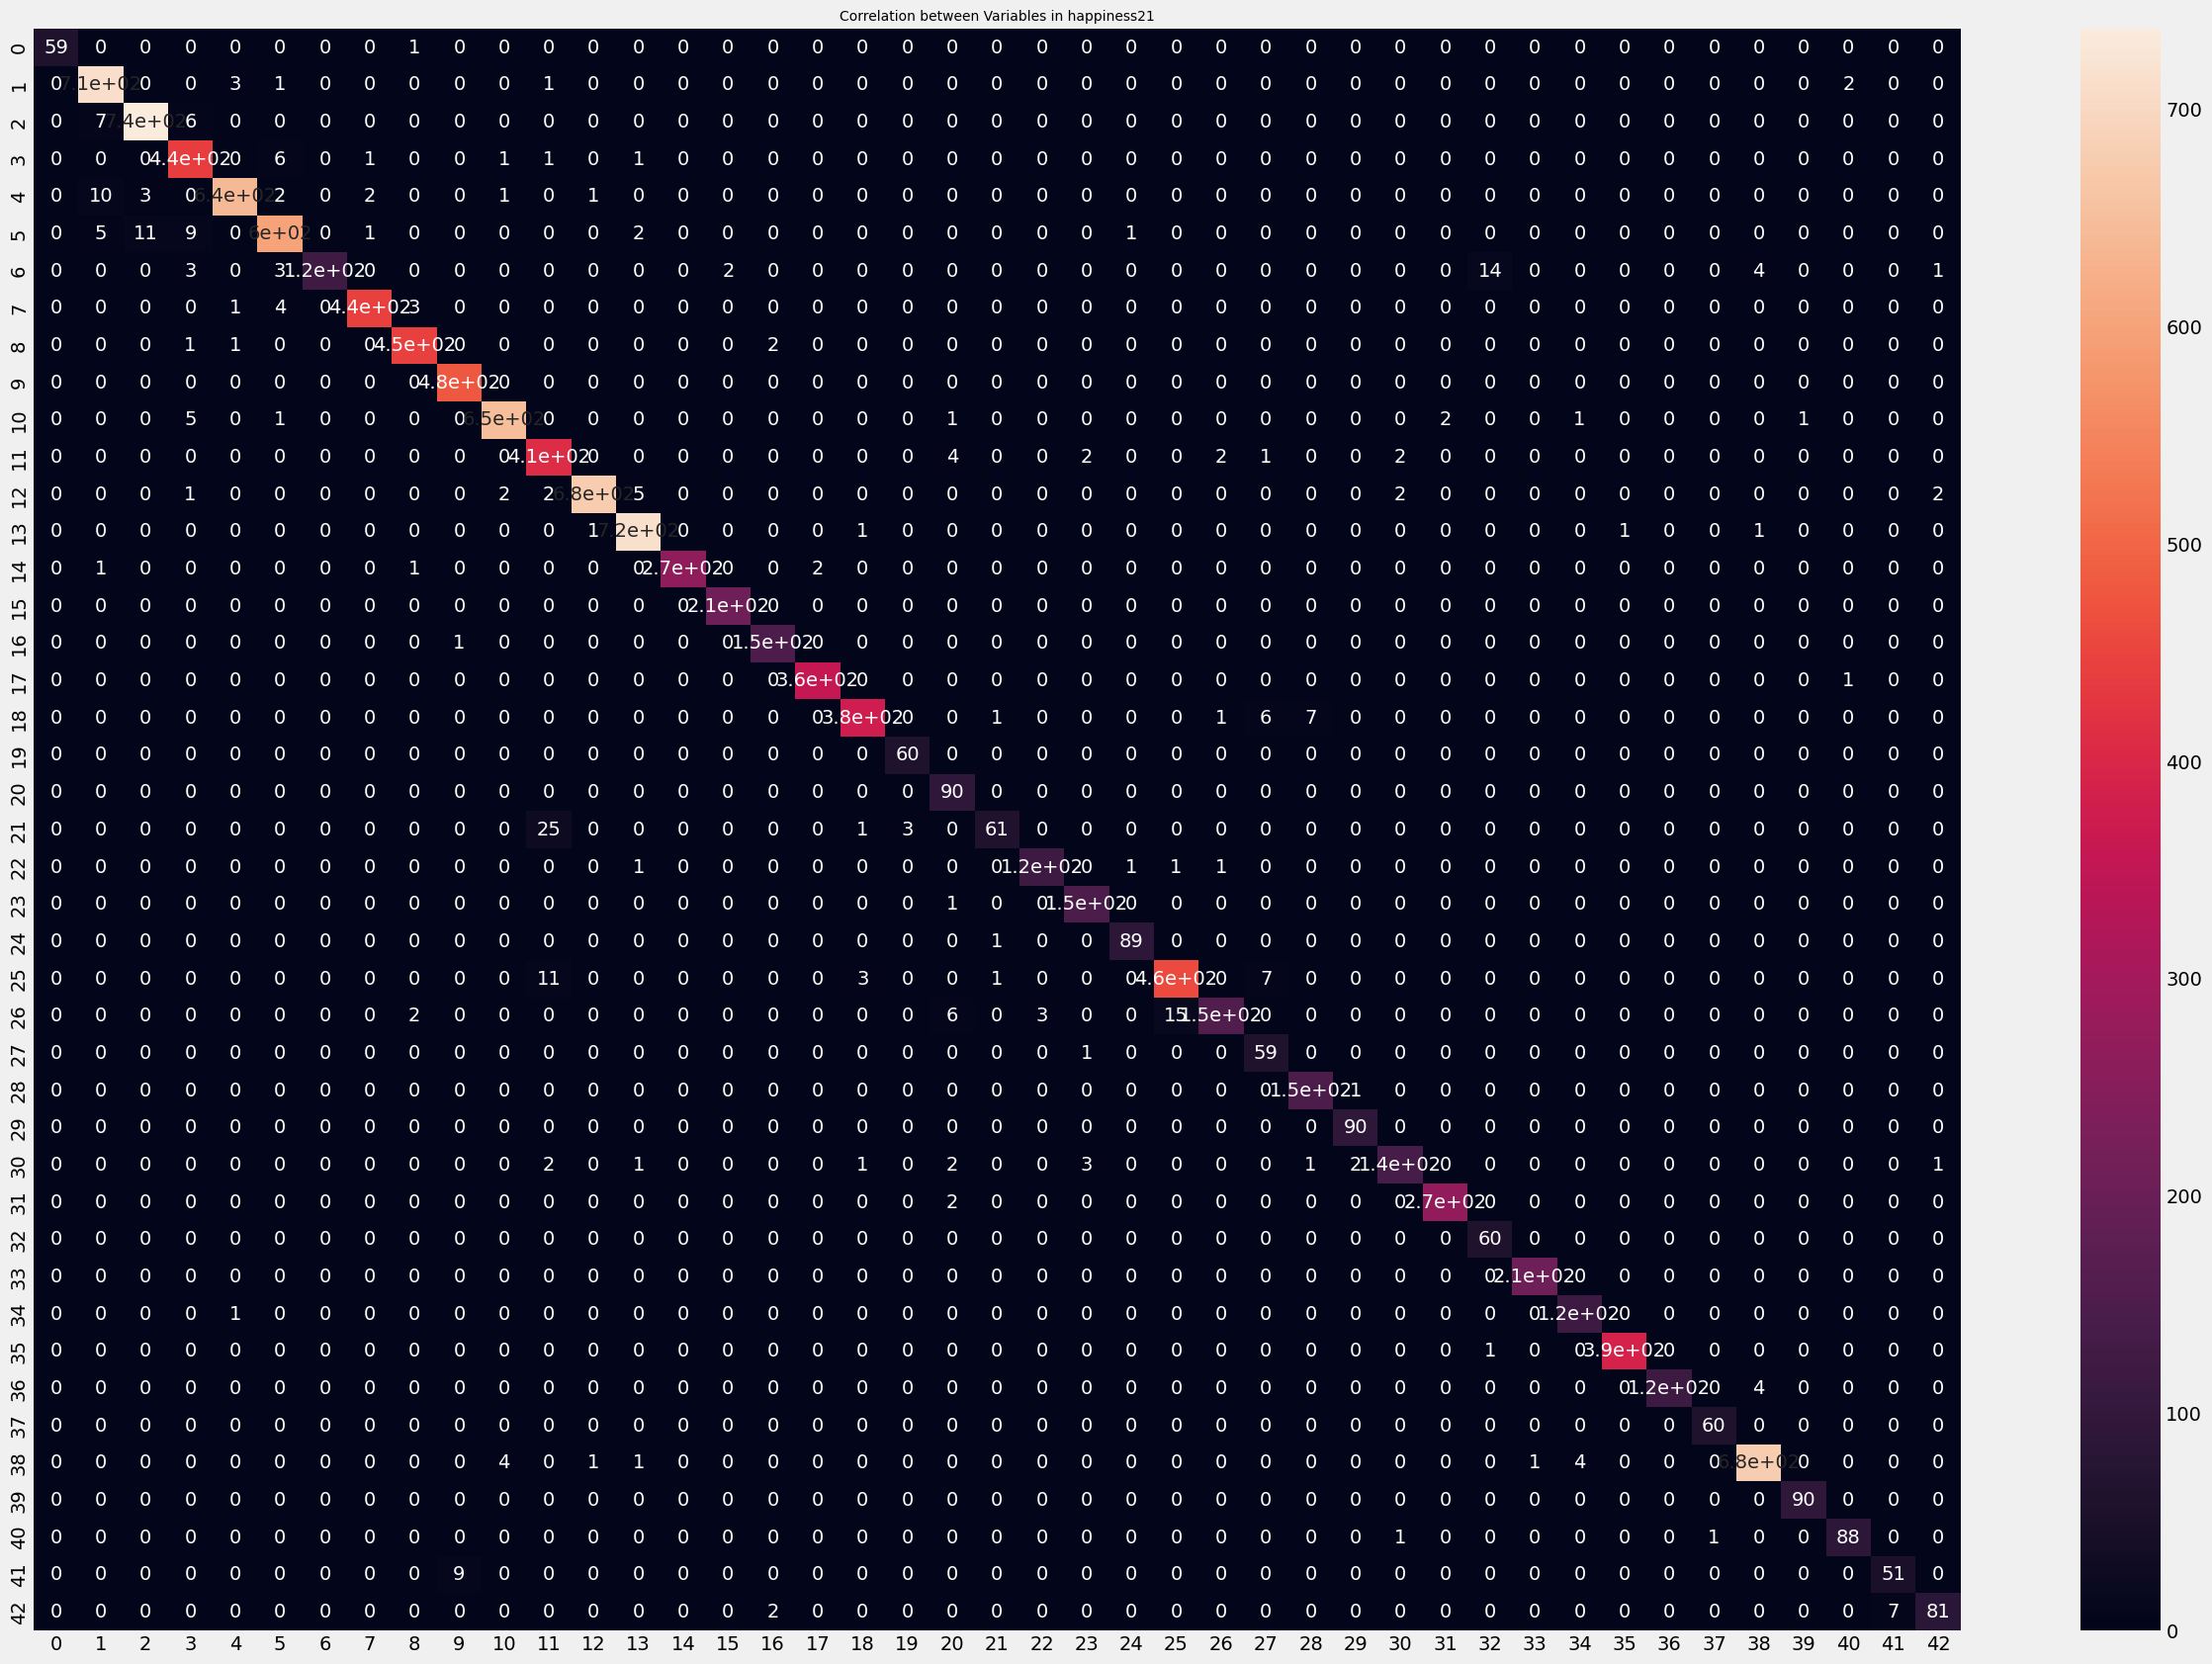

In [30]:
plt.figure(figsize=(28,20))
heatmap(cm,annot=True, fmt='.2g')
plt.title('Correlation between Variables in happiness21', fontsize=10)